### GIS-E1030 Introduction to spatial methods - Assingment1

The assignment A1 - Creation of orthophotos with Matlab is conducted by using python with Jupyter notebook setting. As following the workflow of the assignment, this documents contains four sections. At first, it provide a short short description of findings regard to the asked question. The second section displays lines of code for the implimentation with few notes. The third section discuss about the results and findings from implementation of the creating an orthophoto. Last section complete the documents by giving a short self-evaluation.

### 1 What are orthophotos?

A definition of orthophoto (orthophotography or orthoimage) is an aerial photography or satellite image that is geometrically corrected from edge to edge. It means that the scale is uniformed and the photo or image follows a given map projection. Unlike an uncorrected aerial photography, an orthophoto can be use to measure true distance since it is an accurate representation of the earth's surface, having been adjusted for topographic relies, lens distortion, and camera tilt.(Mapasyst.extension.org, 2021) Therefore, "true orthophotos" means that an aerial photography or satellite image that has been corrected its topographic relies, lens distortion, and camera tilt.

When we consider an implementation of the adjustment to create orthophoto, "true orthophotos" seems to have variations. For instance, Z-buffer based methods are more popular than indirect methods (implemented later). Hu et al review literatures (Amhar et al., 1998; Rau et al., 2000; Nielsen, 2004; Oda et al., 2004; Bang et al., 2007; Habib et al., 2007; Chen et al., 2007; Antequera et., 2008; Bang and Kim, 2010) and claim that;

_"The z-buffer (aka depth buffer in computer graphics), is a well defined and popular technique used to decide which elements of a rendered scene are visible and which are hidden. It is arranged as a 2D array with on element for each pixel, and records the distances between the perspective centre and the object points corresponding to individual image pixels. Among multiple object points along the same line of sight competing for a single image pixel, the point closest to the perspective centre has the minimum distance value and is judged to be visible, while the other further points are considered invisible. Some modified variants of z-buffer have been proposed to conquer its drawbacks or to extend to rectify images taken by pushbroom sensors."_ (Hu et al, 2016)

The z-buffer models seemed to have several layer of computation in order to make what is visible and hidden. Hu et al concluded that their innovative approach to produce true orthophoto, it has two major stage. first, images are generated with occluded areas detected using the e-buffer based method. Second, occluded areas in any ortho image are filled with data from overlapped ortho images using the segment based compensation method. Detail of the two stages are:

First stage

_"The DTM data is interpolated and the DBM data is rasterized both at the ortho resolution to create the elevation map.The e-map is projected to the raw image space to form a quadrilateral tessellation, which is then rasterized to create the e-buffer. The raw e-buffer is resampled to provide the possible highest elevation at each ortho pixel location.The v-map is created to classify each ortho pixel to be either visible or invisible. Finally, the grey values of all the visible pixels are resampled from the raw image and this initial ortho image usually contains obscured pixels."_

Second stage

_"The boundaries of the occluded regions are traced, and their sizes are evaluated. For each candidate region, the visible pixels along its boundary are trimmed outward up to specified pixels. Multiple adjacent slave ortho images having overlaps with the master image are employed for compensating the trimmed regions. These slave images are applied in an order determined by a rating based on a quality measure. At the same time, the feathering is performed along seam lines. The remaining small holes are filled up to a specified pixel size."_ (Hu et al, 2016) 

It deemed that Z-buffer based methods and indirect methods are different in terms of computational efforts and implementation of algorithms. Therefore, it is better to have clear idea of application. It can be guided with ISO standards, specifications, and recommendations to ensure the level of quality. For example, NLS provide a description of their Orthophotos such as pixel size, spatial representation, data contents and its quality information such as lineage and conformity. Detail of such descriptions relates to the ISO standards and specifications.(National Land Survey of Finalnd, 2021) Other example for the recommendations can relates to Smith's publication that describes five recommendations for reviewing digital orthophoto imeagery(Smith, 1995);

* Sample points away from roads and location where DEM points will have been taken.

* Require that the DEM and the digital imagery be provided before the review process is started. It is often helpful to review the imagery with these point positioned on top of the imagery.

* Consider having the contractor deliver a point coverage for the centers of the original photography that can be positioned o top of the digital imagery. This will allow the review to identify the photo from which the orthophoto was built.

* Where possible overlay the imagery with a linear coverage like a road or stream network from another map source to help look for spatial errors.

* Establish an accept/reject criteria before starting the review process.  Pieces of dirt and lint will occur.  Establishing ahead of time the maximum amount and size acceptable will facilitate the process. This should be shared with the contractor.


In short, true orthophoto is geometrically corrected aerial photography or satellite image by applying certain algorithm in topographic relies, lens distortion, and camera tilt. That must have a certain level of confidence that tie to ISO standards, specifications, and recommendations. Variation of those implementation methods can be decided based on a application and data sets.

Reference

Mapasyst.extension.org. 2021. What is an orthophoto? – Geospatial Technology. [online] Available at: <https://mapasyst.extension.org/what-is-an-orthophoto/> [Accessed 29 September 2021].

Smith, G.S., 1995, May. Digital orthophotography and GIS. In Proceedings of the 1995 ESRI User Conference (pp. 22-26).

Thrower, N.J. and Jensen, J.R., 1976. The orthophoto and orthophotomap: characteristics, development and application. The American Cartographer, 3(1), pp.39-56.

Hu, Y., Stanley, D. and Xin, Y., 2016. TRUE ORTHO GENERATION OF URBAN AREA USING HIGH RESOLUTION AERIAL PHOTOS. ISPRS Annals of Photogrammetry, Remote Sensing & Spatial Information Sciences, 3(4).




### 2 Creating an orthophotos by translating Matlab code in python

To complete given Matlab code on python, we needed to import few package at the first. Seaborn and Pandas were effective to handle data. At first, we are defining functions that made by translating the Matlab code and adding equations from the lecture materials. Later on, we started checking need variables to see how those are working.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from sklearn.neighbors import KDTree
from tqdm.autonotebook import tqdm
from IPython.display import Image

<ipython-input-1-7f28f79f87d8>:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
def read_laserdata(filename="laserdata.txt"):
    df = pd.read_csv(filename, sep=' ', header=None)
    laser_data = df.to_numpy()
    return laser_data


def read_image(filename="test_image_gray.tif"):
    image = plt.imread(filename)
    return image

In [4]:
def read_camera_orientation_info(filename="camera_orientation_info.txt"):

    with open(filename, 'r') as f:
        lines = f.read().splitlines()

    pp_x = float(lines[1])
    pp_y = float(lines[2])
    c = float(lines[4])

    x_0 = float(lines[9])
    y_0 = float(lines[10])
    z_0 = float(lines[11])

    r = np.zeros((3, 3))

    for i in range(3):
        str_row = lines[13 + i].split("\t")
        r[i] = [float(x) for x in str_row]

    return pp_x, pp_y, c, r, x_0, y_0, z_0

In [5]:
def d(x, x_i):

    try:
        X, Y = x
        X_i, Y_i = x_i
        return np.sqrt((X - X_i) ** 2 + (Y - Y_i) ** 2)
    except:
        print('was it testing with 1D?')
        return np.sqrt((x - x_i) ** 2)


def w(d_i, p=2):
    return 1 / d_i**p


def u(neighbours_u, neighbours_d):

    n = len(neighbours_d)

    weights = []
    for i in range(n):
        d_i = neighbours_d[i]
        weight_i = w(d_i)
        weights.append(weight_i)

        # print(f'weight {i+1}: {weight_i}')

    sum_weights = np.sum(weights)

    total = 0
    for i in range(n):
        u_i = neighbours_u[i]
        w_i = weights[i]
        to_add = w_i * u_i
        total += to_add

        # print(f'w{i + 1}u{i+1}: {to_add}')

    result = total / sum_weights
    return result

In [6]:
def collinearity_equations(x, y, z, c, x0, y0, z0, r):
        
    denom = r[2, 0]*(x-x0) + r[2, 1]*(y-y0) + r[2, 2]*(z-z0)
    x_cam = -c * (r[0, 0]*(x-x0) + r[0, 1]*(y-y0) + r[0, 2]*(z-z0)) / denom
    y_cam = -c * (r[1, 0]*(x-x0) + r[1, 1]*(y-y0) + r[1, 2]*(z-z0)) / denom
        
    return x_cam, y_cam

In [7]:
def camera_coordinates2image_coordinates(x_cam, y_cam, pp_x, pp_y):
    # -1: matlab/python conversion
    return x_cam + pp_x - 1, pp_y - y_cam - 1

In [8]:
def bilinear_interpolation(x_img, y_img, image):
    
    k = int(x_img)
    l = int(y_img)
    dx = x_img - k
    dy = y_img - l
    return (1-dx)*(1-dy)*image[l, k] + dx*(1-dy)*image[l, k+1] + (1-dx)*dy*image[l+1, k] + dx*dy*image[l+1, k+1]

In [9]:
grid_size = 0.2 

In [10]:
laser = read_laserdata()
laser_x = laser[:, 0]
laser_y = laser[:, 1]
laser_z = laser[:, 2]

In [11]:
pp_x, pp_y, c, r, x0, y0, z0 = read_camera_orientation_info()

In [12]:
image = read_image()

In [13]:
img_shape = image.shape
img_shape

(2028, 3037)

In [14]:
laser_x.min(), laser_x.max()

(6088.331, 6129.6)

In [15]:
laser_y.min(), laser_y.max()

(5226.271, 5276.468)

In [16]:
n_col = int(np.round((laser_x.max() - laser_x.min())/grid_size))
n_row = int(np.round((laser_y.max() - laser_y.min())/grid_size))

In [17]:
n_row, n_col

(251, 206)

#### Creating the orthophoto filled with zeros

In [18]:
orthophoto = np.zeros((n_row, n_col))

x_start = laser_x.min()
y_start = laser_y.min() + grid_size*n_row

In [19]:
laser_xy = np.vstack((laser_x, laser_y)).T
tree = KDTree(laser_xy)
dem = np.zeros((n_row, n_col))
n_comp = n_row*n_col

#### Computation

The block below computes Digital Elevation Model(DEM), collinearity equation, camera  coordinates to image coordinates, and bilinear interpolation. 

In [20]:
with tqdm(total=n_comp) as pb:

    for i in range(n_row):
    
        for j in range(n_col):
            
            x = x_start + j*grid_size
            y = y_start - i*grid_size

            dist, ind = tree.query(np.array([[x, y], ]), k=5)
            # ind/dist shape: 1 x k
            neighbours_u = laser_z[ind[0]]
            neighbours_d = dist[0]

            interpolated_height = u(neighbours_d=neighbours_d,
                                    neighbours_u=neighbours_u)
            dem[i, j] = interpolated_height
            
            # 3D point to image plane
            x_cam, y_cam = collinearity_equations(x, y, interpolated_height, c, x0, y0, z0, r)
            
            # from camera coordinate system into image coordinate system
            x_img, y_img = camera_coordinates2image_coordinates(x_cam, y_cam, pp_x, pp_y)
            # 'matlab' row and 'matlab' column!!
            row = int(y_img)
            column = int(x_img)
            
            # floor cannot lead to 0... therefore >1
            if row > 0 and column > 0 and row < img_shape[0] and column < img_shape[1]: 
                # selecting the best color value from original image using
                # bilinear interpolation
                
                # color1 = row,column; color2=row,column+1; color3=row+1,column; color4=row+1,column+1 
                interpolated_color = bilinear_interpolation(x_img, y_img, image)
                
                # setting interpolated color value to ortho image 
                orthophoto[i,j] = interpolated_color

            else:
                # if we are outside the image area, set color value zero
                orthophoto[i,j] = 0.0
                
            pb.update()

  0%|          | 0/51706 [00:00<?, ?it/s]

#### Plot digital elevation model (DEM)

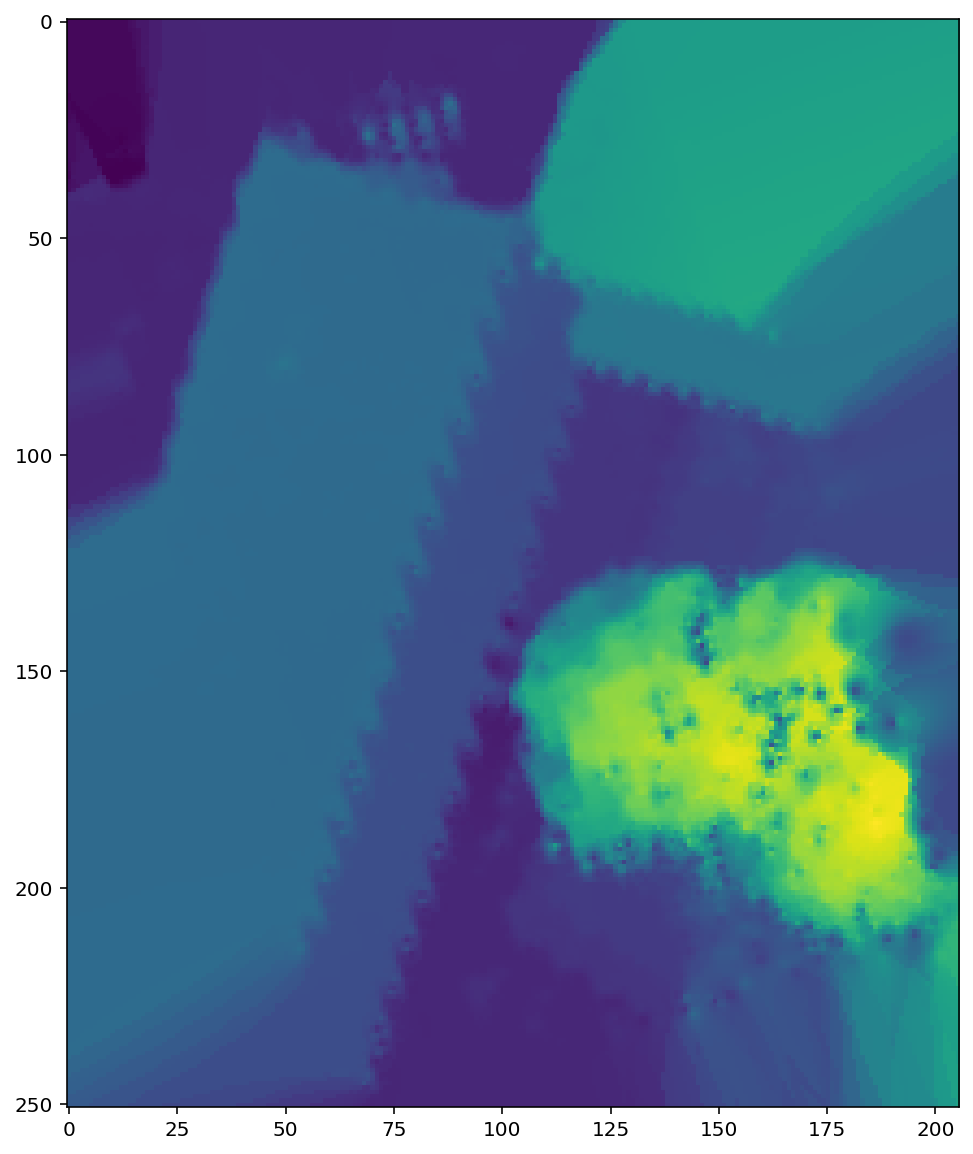

In [21]:
fig, ax = plt.subplots(figsize=(15, 10)) 

ax.imshow(dem)
plt.savefig("digital_elevation_model.pdf")

#### Plot DEM with laser data points

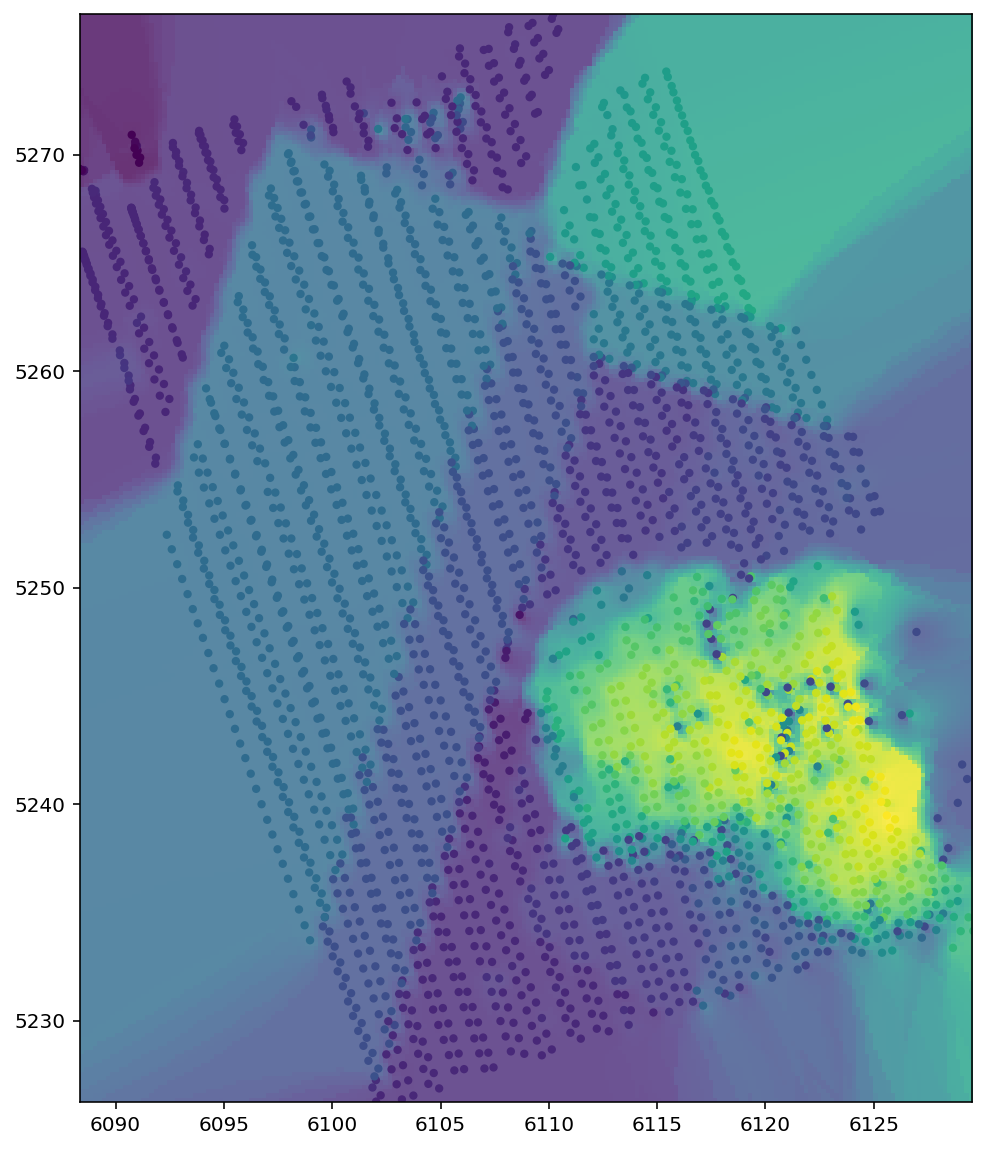

<Figure size 432x288 with 0 Axes>

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))

left = x_start
right = x_start + grid_size*n_col
bottom = y_start - grid_size*n_row
top = y_start

ax.imshow(dem, extent=(left, right, bottom, top), alpha=0.8)

ax.scatter(laser_x, laser_y, c=laser_z, s=10)

ax.set_xlim(left, right)

plt.show()
plt.savefig("DEM_with_laser_data_points.pdf")

#### Plot orthophoto with the laser data points

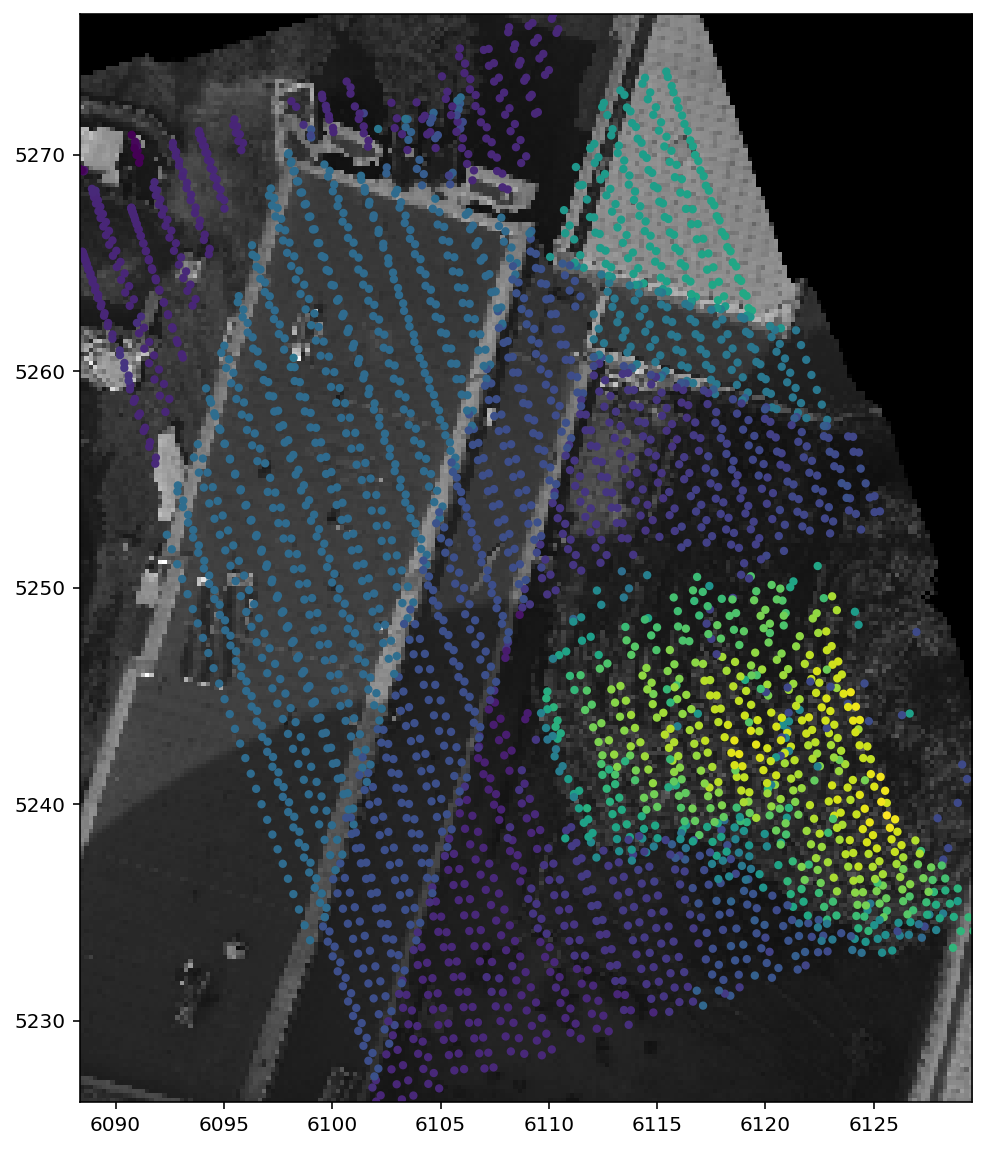

<Figure size 432x288 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))

left = x_start
right = x_start + grid_size*n_col
bottom = y_start - grid_size*n_row
top = y_start

ax.imshow(orthophoto, extent=(left, right, bottom, top), cmap="gray")

ax.scatter(laser_x, laser_y, c=laser_z, s=10)

ax.set_xlim(left, right)

plt.show()
plt.savefig("orthophoto_with_laser_data_points.pdf")

#### Review original image

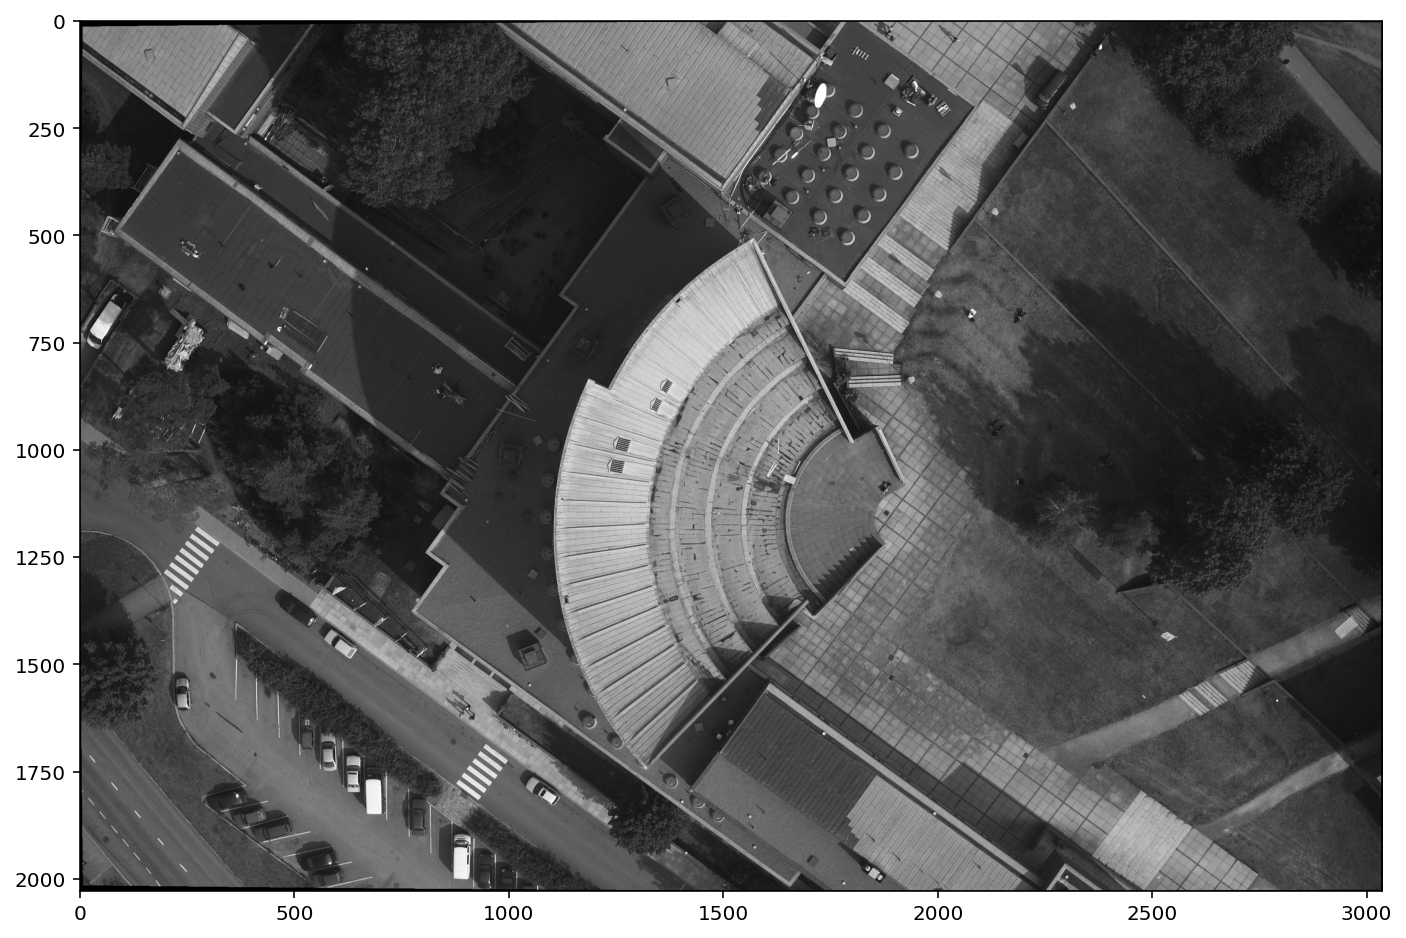

In [24]:
fig, ax = plt.subplots(figsize=(13, 8))

ax.imshow(image, cmap="gray",  vmin=0, vmax=255)

plt.show()

#### Plot orthophoto with DEM

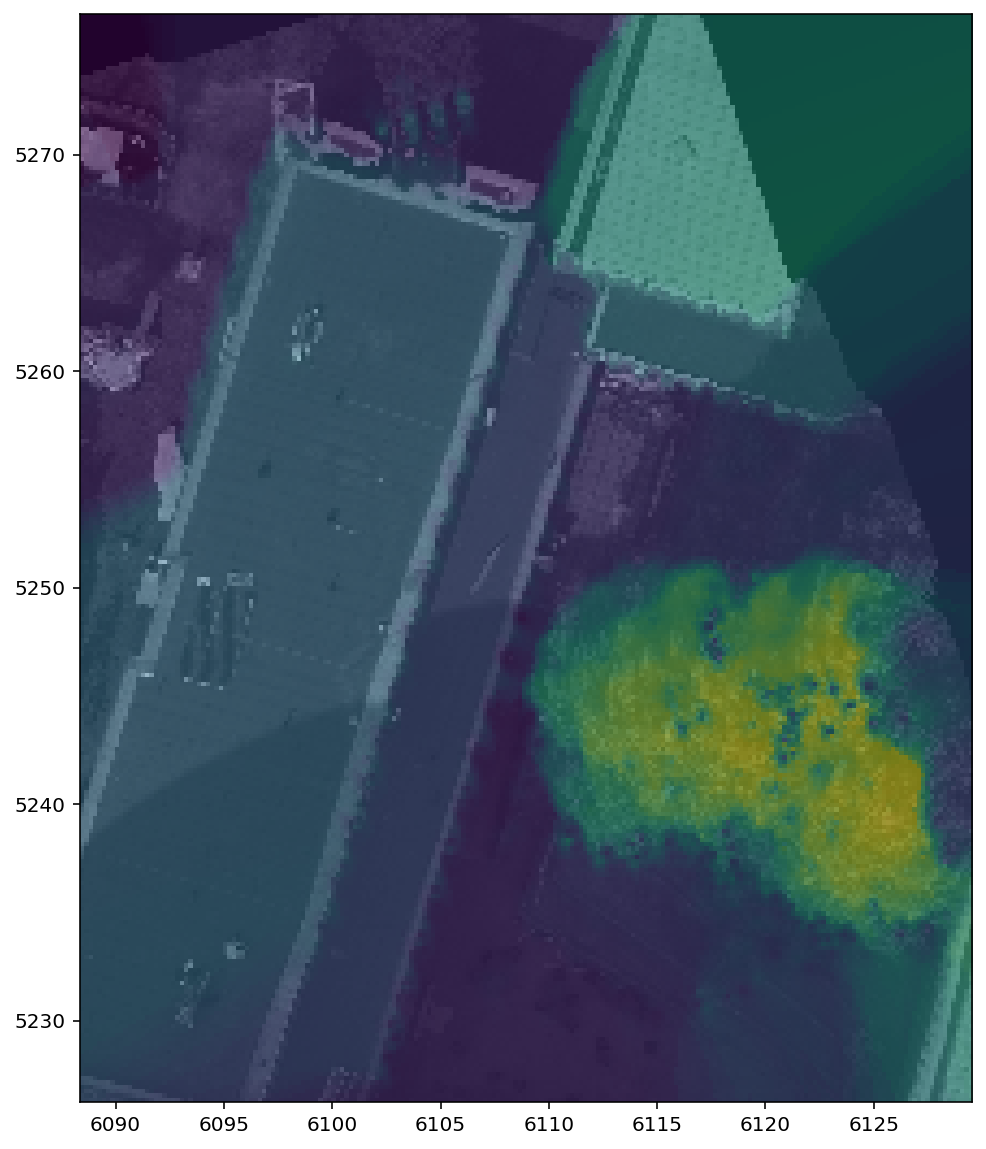

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))

left = x_start
right = x_start + grid_size*n_col
bottom = y_start - grid_size*n_row
top = y_start

ax.imshow(orthophoto, extent=(left, right, bottom, top), cmap="gray")

ax.imshow(dem, extent=(left, right, bottom, top), alpha=0.5)

plt.show()

#### Creating orthophoto

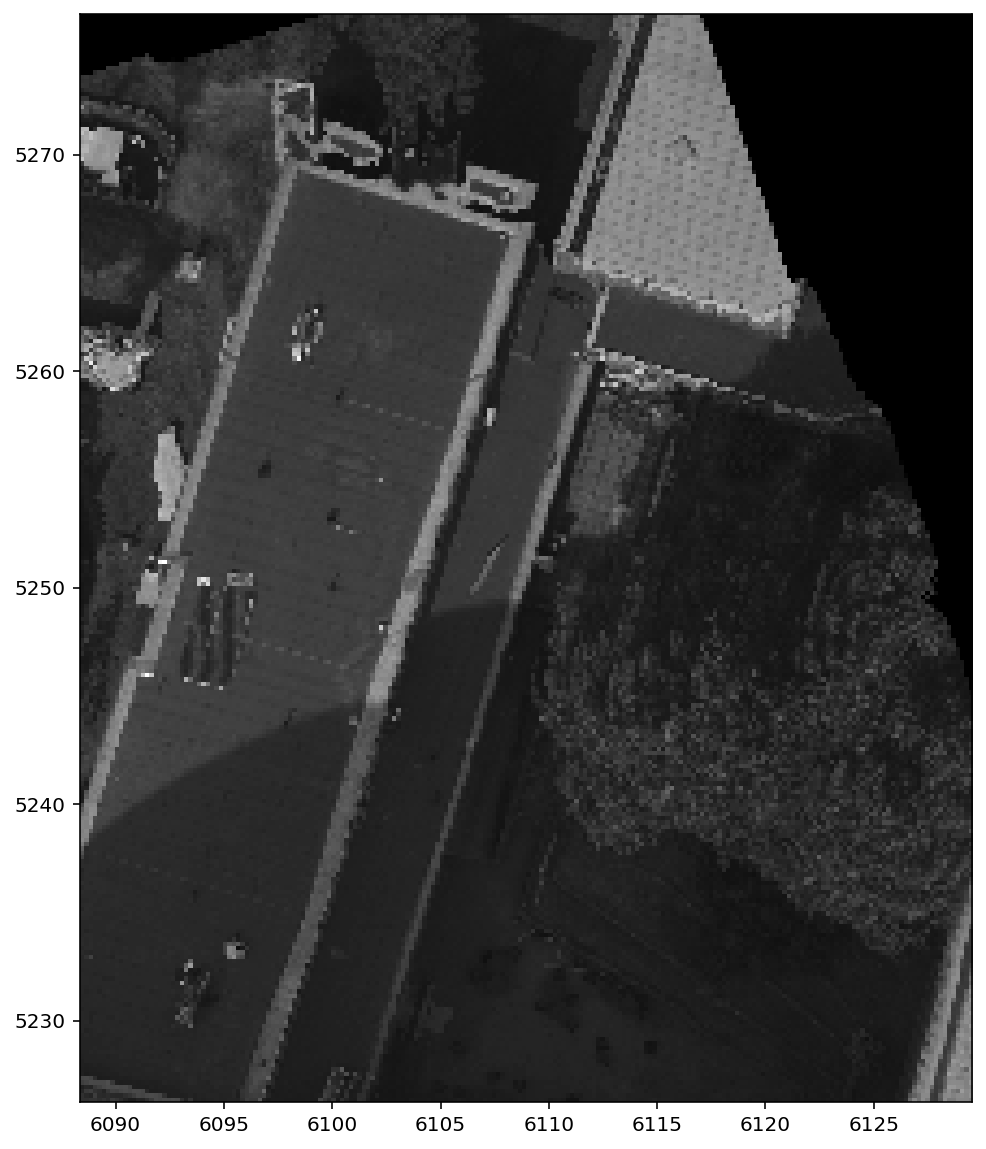

<Figure size 432x288 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))

left = x_start
right = x_start + grid_size*n_col
bottom = y_start - grid_size*n_row
top = y_start

ax.imshow(orthophoto, extent=(left, right, bottom, top), cmap="gray")

plt.show()
plt.savefig("creating_orthophoto.pdf")

### 3 Discussion -  the results and findings from the implementation



The final output has dark colour on the top right conner since it is out side of original (which is not a straight line). Therefore the colour value became 0.0. In theory, producing an orthophoto by using z-buffer based methods might help to fix the non-straight line since the technique use for deciding which element of a rendered scene are visible and which are hidden as Hu et al suggested. (Hu et.al, 2016) Although, it might cost more efforts to produce an orthophoto, and it seemed to be complex to use various tools(package) to modify the edge of the orthophoto due to tone of shadows.

### 4 Short self-evaluation
It seemed to be difficult to understand the provided code for students who learned a programming in other languages. Other difficulty can be the gap of knowledge in Geoinformatic's specific terminology and techniques such as understanding the various coordination systems which used in image and data provided for creating an orthophoto. It took while to understand a reason of addition and subtraction in front of index i and j in the upper part of Computation(the first two lines in side of for loops). It creates the output image that rotated regarding to the laser data values. Therefore, the north is in the top of image. 